In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_old = pd.read_csv("/content/Food demand.csv")

In [ ]:
df_old.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1000000,3,157,2760,233.83,231.83,0,0,149
1,1000001,100,104,2956,486.03,583.03,0,0,161
2,1000002,143,75,1971,328.86,327.86,0,0,149
3,1000003,41,24,2539,145.53,145.53,0,0,540
4,1000004,45,83,2539,95.06,120.34,0,0,271


In [ ]:
# Predict the demand of the food based on orders
# find the number of orders in week 202

# num_orders = target variable


In [ ]:
# id is not used for predictions so we drop all the ids

#before that check for null values in a dataframe

df_old.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [ ]:
#there are no null values


In [ ]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1999 non-null   int64  
 1   week                   1999 non-null   int64  
 2   center_id              1999 non-null   int64  
 3   meal_id                1999 non-null   int64  
 4   checkout_price         1999 non-null   float64
 5   base_price             1999 non-null   float64
 6   emailer_for_promotion  1999 non-null   int64  
 7   homepage_featured      1999 non-null   int64  
 8   num_orders             1999 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [ ]:
# we need to convert float data type to int
df_old["base_price"] = df_old["base_price"].astype('int')
df_old["checkout_price"] = df_old["checkout_price"].astype('int')

In [ ]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   id                     1999 non-null   int64
 1   week                   1999 non-null   int64
 2   center_id              1999 non-null   int64
 3   meal_id                1999 non-null   int64
 4   checkout_price         1999 non-null   int64
 5   base_price             1999 non-null   int64
 6   emailer_for_promotion  1999 non-null   int64
 7   homepage_featured      1999 non-null   int64
 8   num_orders             1999 non-null   int64
dtypes: int64(9)
memory usage: 140.7 KB


In [ ]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1000000,3,157,2760,233.83,231.83,0,0,149
1,1000001,100,104,2956,486.03,583.03,0,0,161
2,1000002,143,75,1971,328.86,327.86,0,0,149
3,1000003,41,24,2539,145.53,145.53,0,0,540
4,1000004,45,83,2539,95.06,120.34,0,0,271


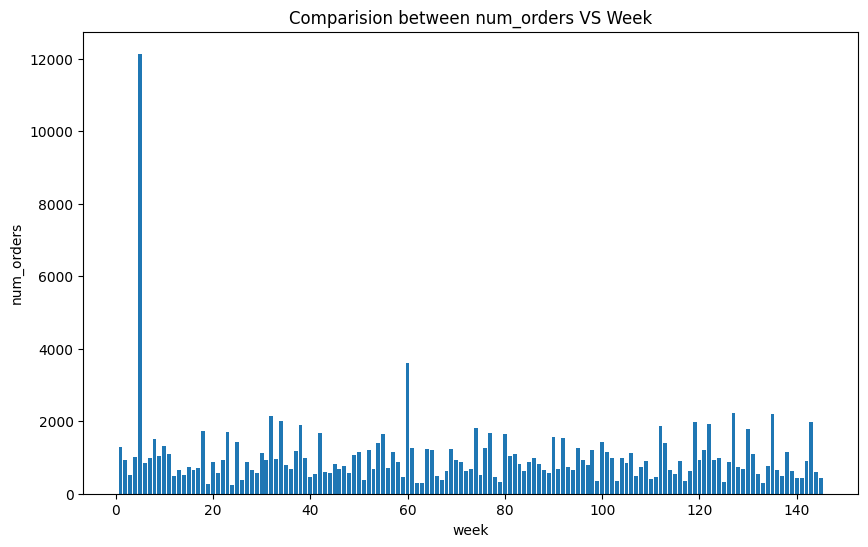

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel("week")
plt.ylabel("num_orders")
x_label = df_old["week"]
y_label = df_old["num_orders"]
plt.bar(x_label,y_label)
plt.title("Comparision between num_orders VS Week")
plt.show()

In [ ]:
# from the graph we see there are some outliers in the dataset
df_old.shape

(1999, 9)

In [ ]:
# identify the outliers in num_orders and removing them

Q1 = df_old["num_orders"].quantile(0.25)
Q3 = df_old["num_orders"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_old[(df_old["num_orders"]<lower_bound) | (df_old["num_orders"]>upper_bound)]
df = df_old[~df_old.index.isin(outliers.index)]

len(outliers),df.shape

(145, (1854, 9))

In [ ]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1000000,3,157,2760,233,231,0,0,149
1,1000001,100,104,2956,486,583,0,0,161
2,1000002,143,75,1971,328,327,0,0,149
3,1000003,41,24,2539,145,145,0,0,540
4,1000004,45,83,2539,95,120,0,0,271


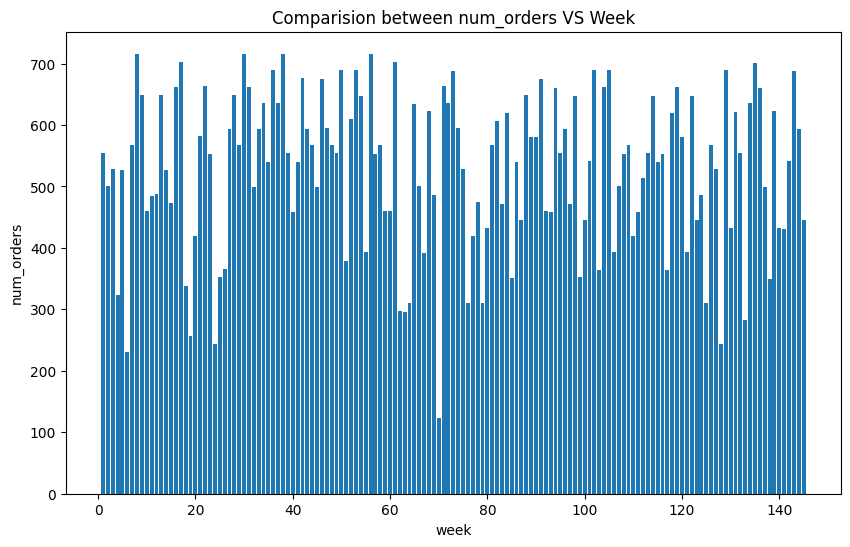

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel("week")
plt.ylabel("num_orders")
x_label = df["week"]
y_label = df["num_orders"]
plt.bar(x_label,y_label)
plt.title("Comparision between num_orders VS Week")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1854 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   id                     1854 non-null   int64
 1   week                   1854 non-null   int64
 2   center_id              1854 non-null   int64
 3   meal_id                1854 non-null   int64
 4   checkout_price         1854 non-null   int64
 5   base_price             1854 non-null   int64
 6   emailer_for_promotion  1854 non-null   int64
 7   homepage_featured      1854 non-null   int64
 8   num_orders             1854 non-null   int64
dtypes: int64(9)
memory usage: 144.8 KB


In [ ]:
# Predict the demand of the food based on orders
# find the number of orders in week 202

# num_orders = target variable

In [ ]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df["num_orders"]
X = df.drop("num_orders",axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)



In [ ]:
model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X_test)
y_pred[:5]

array([ 95.8582003 , 100.15839405, 134.60326818, 185.41488768,
        69.5477155 ])

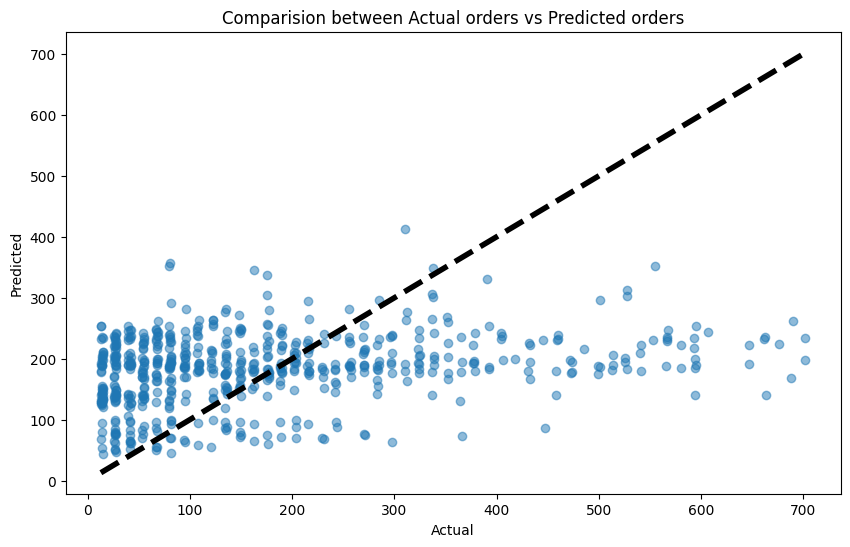

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()], 'k--', lw=4)
plt.title("Comparision between Actual orders vs Predicted orders")
plt.show()